<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#bcbcbc;
           font-size:300%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="font-size:30px;text-align:center"> Bone Marrow Changes in Lumbar Vertebrae MRI Classification</p>
</div>


<p style="text-align:center;"><img src="https://www.ajronline.org/cms/10.2214/AJR.11.7005/asset/images/12_11_7005_01.jpeg" width="200" height="350">
    
    
    
    
    
The objective of this project is to build a deep-learning model that can accurately classify MRI images as either Normal or Abnormal. The model will be trained on a dataset of labeled MRI images and will learn to identify specific patterns and features associated with Bone Marrow Changes in Lumbar Vertebrae. For Bone Marrow Changes in Lumbar Vertebrae classification, Bone Marrow Changes in Lumbar Vertebrae were divided into two main groups: Normal, and Abnormal, depending on the area that is involved. Each of these classes is subsequently divided into sub-groups. To introduce a transfer learning model that can improve the classification of Bone Marrow Changes in Lumbar Vertebrae.

In [1]:
# Import packages
#from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Use ImageDataGenerator to rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
# Define the general path
path = '/input/bonewithout-augment-70-20-10/boneWithOut_Augment/'

In [4]:
# Load the images
train_generator = train_datagen.flow_from_directory(directory=path +'train', 
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)


Found 712 images belonging to 2 classes.


In [5]:

valid_generator = valid_datagen.flow_from_directory(directory=path +'val', 
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)



Found 203 images belonging to 2 classes.


In [6]:

test_generator = test_datagen.flow_from_directory(directory=path +'test',
                                                  target_size=(224, 224),
                                                  batch_size=1,
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=42)

Found 103 images belonging to 2 classes.


In [7]:
model= Sequential()

model.add(Conv2D(filters=128,strides= 1, kernel_size = (5,5), activation='relu', input_shape=(224,224,3,)))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=64,kernel_size = (5,5),activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation = 'softmax'))

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 30)        17310     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 30)       0

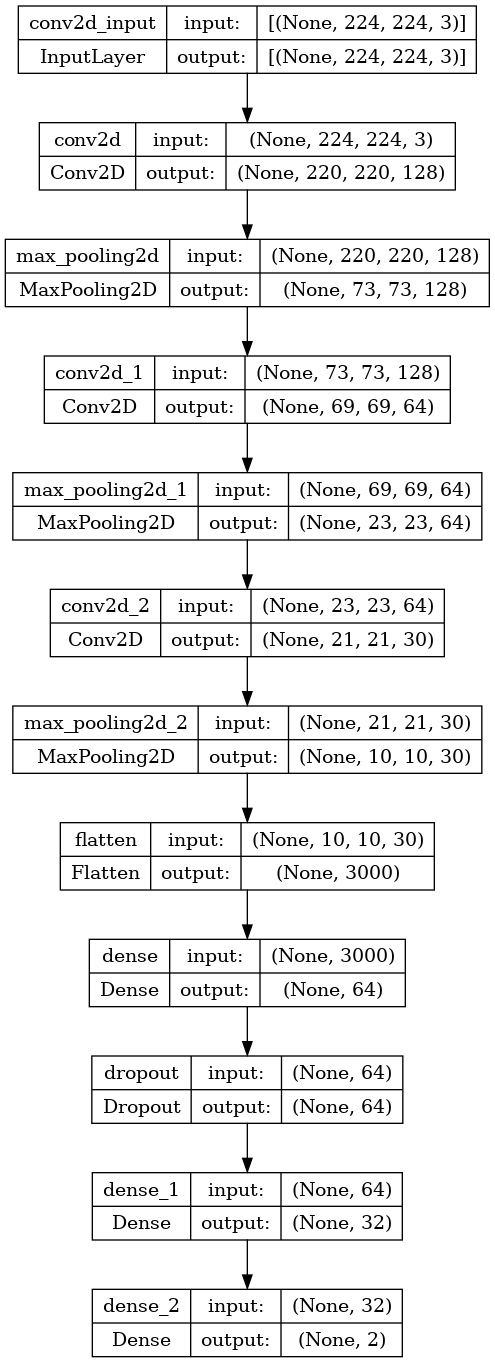

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

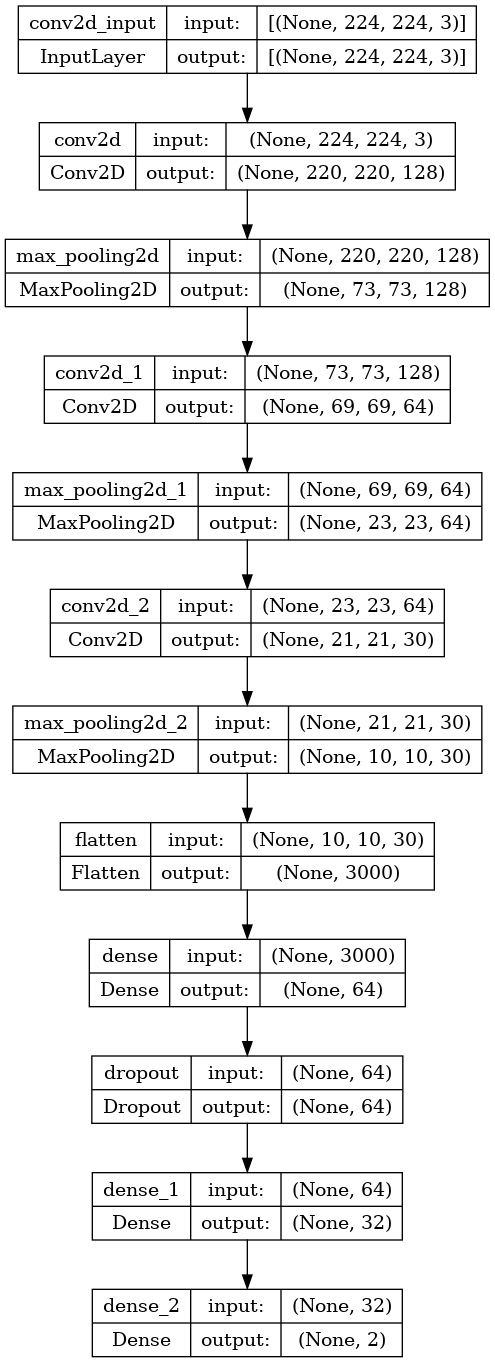

In [11]:
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB')

In [12]:
# Hyperparameters
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

In [13]:
# Stop the training when there is no improvement after 10 epochs trainings.
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [14]:
# Train the model
history =model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,verbose= 1,
          validation_steps=STEP_SIZE_VALID,
          epochs=20, callbacks=early_stop)

Epoch 1/20
22/22 [==============================] - 134s 6s/step - loss: 0.6911 - accuracy: 0.5471 - val_loss: 0.6734 - val_accuracy: 0.5677
Epoch 2/20
22/22 [==============================] - 136s 6s/step - loss: 0.6637 - accuracy: 0.5895 - val_loss: 0.6660 - val_accuracy: 0.6094
Epoch 3/20
22/22 [==============================] - 131s 6s/step - loss: 0.6580 - accuracy: 0.6132 - val_loss: 0.6563 - val_accuracy: 0.6250
Epoch 4/20
22/22 [==============================] - 130s 6s/step - loss: 0.6479 - accuracy: 0.6353 - val_loss: 0.6514 - val_accuracy: 0.6042
Epoch 5/20
22/22 [==============================] - 130s 6s/step - loss: 0.6262 - accuracy: 0.6485 - val_loss: 0.6114 - val_accuracy: 0.6562
Epoch 6/20
22/22 [==============================] - 135s 6s/step - loss: 0.5708 - accuracy: 0.7060 - val_loss: 0.6207 - val_accuracy: 0.6510
Epoch 7/20
22/22 [==============================] - 130s 6s/step - loss: 0.5242 - accuracy: 0.7353 - val_loss: 0.5694 - val_accuracy: 0.7031
Epoch 8/20
22

In [15]:
# Evaluate the model
model.evaluate(valid_generator,steps=STEP_SIZE_VALID)

6/6 [==============================] - 9s 2s/step - loss: 0.4479 - accuracy: 0.8594


[0.4478570520877838, 0.859375]

In [16]:
# Save the model
model.save("model_CNN")

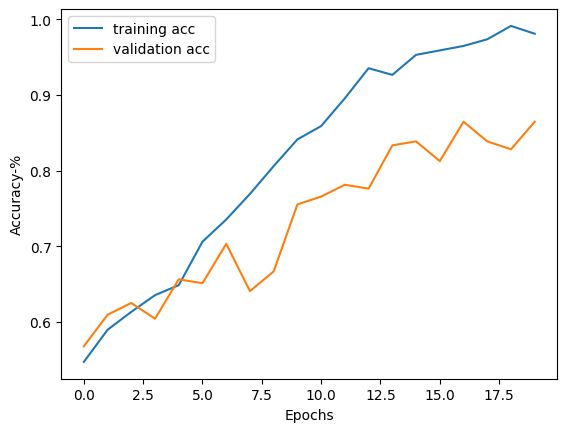

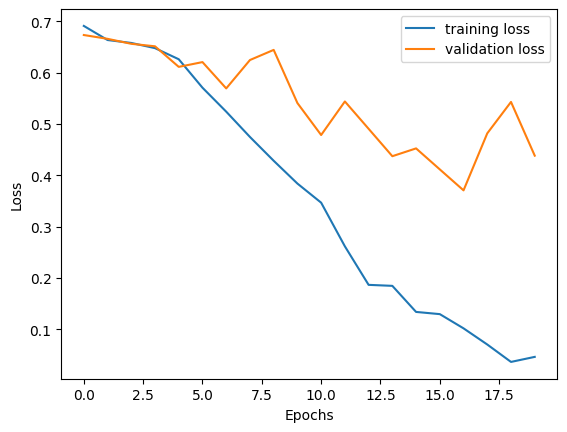

In [17]:
# plot learning curve
def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='training acc')
    plt.plot(epochs, val_acc, label='validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-%')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_learning_curve(history)

In [18]:
#info about optimizers
model.optimizer.get_config() 

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Predict Output
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


103/103 [==============================] - 5s 48ms/step


In [20]:
predictions[0:5]

['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal']

In [21]:
current_idx = 0
count_accurate= 0
Actual = []
for i in predictions:
    string = test_generator.filenames[current_idx]
    substr = '/'
    actual = string[:string.find(substr)]
    Actual.append(actual)
    pred = predictions[current_idx]
    if actual == pred: 
        count_accurate += 1
    current_idx +=1
acc = count_accurate/103
print(f"The accuracy on predicted the test images is {round(acc*100,2)}%.")

The accuracy on predicted the test images is 88.35%.


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Actual, predictions))

              precision    recall  f1-score   support

    Abnormal       0.92      0.86      0.89        56
      Normal       0.84      0.91      0.88        47

    accuracy                           0.88       103
   macro avg       0.88      0.89      0.88       103
weighted avg       0.89      0.88      0.88       103



In [23]:
print(confusion_matrix(Actual, predictions))

[[48  8]
 [ 4 43]]


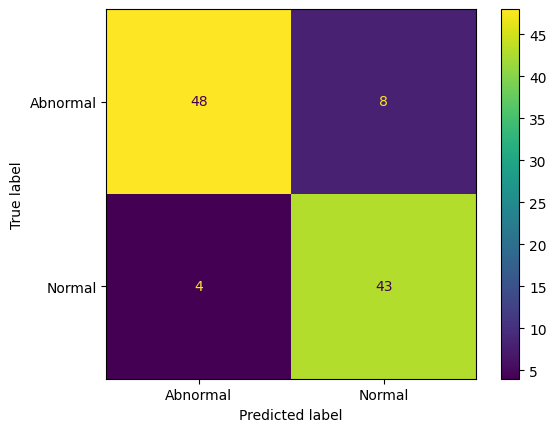

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Actual, predictions)

In [25]:
%who

Actual	 BatchNormalization	 ConfusionMatrixDisplay	 Conv2D	 Dense	 Dropout	 EarlyStopping	 Flatten	 ImageDataGenerator	 
MaxPool2D	 STEP_SIZE_TEST	 STEP_SIZE_TRAIN	 STEP_SIZE_VALID	 Sequential	 acc	 actual	 classification_report	 confusion_matrix	 
count_accurate	 current_idx	 early_stop	 history	 i	 labels	 model	 np	 path	 
plot_learning_curve	 plot_model	 plt	 pred	 predicted_class_indices	 predictions	 string	 substr	 test_datagen	 
test_generator	 train_datagen	 train_generator	 valid_datagen	 valid_generator	 


In [26]:
acc

0.883495145631068

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Assuming 'Actual' and 'predictions' are arrays or lists
conf_matrix = confusion_matrix(Actual, predictions)
# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
tn
# Calculate metrics
accuracy = accuracy_score(Actual, predictions)
precision = precision_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label
recall = recall_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label
specificity = tn / (tn + fp)
f1 = f1_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label

# Print the results
print(f"Accuracy: {round(accuracy, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"Specificity: {round(specificity, 4)}")
print(f"F1-score: {round(f1, 4)}")
print(f"TN: {round(tn)}")
print(f"FP: {round(fp)}")
print(f"FN: {round(fn)}")
print(f"TP: {round(tp)}")

Accuracy: 0.8835
Precision: 0.9231
Recall: 0.8571
Specificity: 0.8571
F1-score: 0.8889
TN: 48
FP: 8
FN: 4
TP: 43
